# first for $ J(\theta)=\theta^2 $

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(color_codes=True)

In [92]:
alpha=.1
theta=3
val=[]
for i in range(0,20):
    res=alpha*2*theta
    val.append([theta,theta**2])
    print('{0:.4f} {1:.4f}'.format(theta,res))
    theta=theta-res
    
    

3.0000 0.6000
2.4000 0.4800
1.9200 0.3840
1.5360 0.3072
1.2288 0.2458
0.9830 0.1966
0.7864 0.1573
0.6291 0.1258
0.5033 0.1007
0.4027 0.0805
0.3221 0.0644
0.2577 0.0515
0.2062 0.0412
0.1649 0.0330
0.1319 0.0264
0.1056 0.0211
0.0844 0.0169
0.0676 0.0135
0.0540 0.0108
0.0432 0.0086


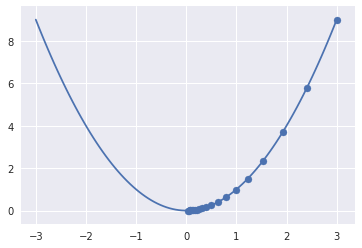

In [93]:
df=pd.DataFrame(data=val,columns=['0','1'])
plt.plot(np.linspace(-3,3,100),np.linspace(-3,3,100)**2)
plt.scatter(df['0'],df['1'])
plt.show()


# now working on Load _Boston


In [94]:
from sklearn.datasets import load_boston

In [95]:
boston_data=load_boston()

In [96]:
df=pd.DataFrame(data=boston_data.data,columns=boston_data.feature_names)

In [97]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [98]:
y=boston_data.target

In [107]:
X=df['RM'].values.reshape(-1,1)#or i can use df[['B']]

In [108]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
X_std=sc_x.fit_transform(X)
y_std=sc_y.fit_transform(y.reshape(-1,1)).flatten()

In [273]:
alpha=0.0001
cost_=[]
w_=np.zeros(1+X_std.shape[1])#.shape gives the number of comumns
n=100
for i in range(n):
    y_pred=np.dot(X_std,w_[1:])+w_[0]
    errors=y_std - y_pred
    
    w_[1:]+=alpha*X_std.T.dot(errors)
    w_[0]+=alpha*errors.sum()
    cost=(errors**2).sum()/2.0
    cost_.append(cost)

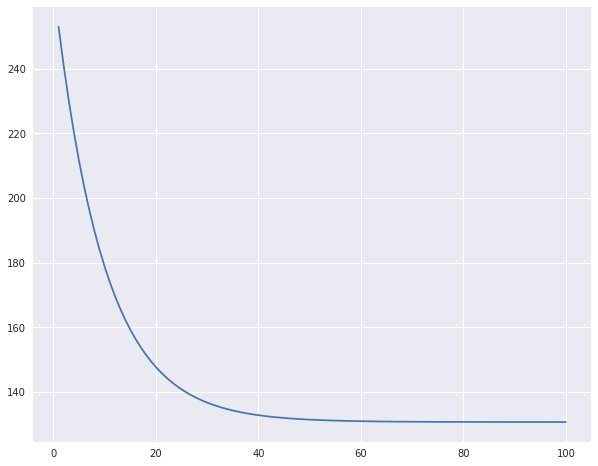

In [110]:
plt.figure(figsize=(10,8))
plt.plot(range(1,n+1),cost_)
plt.show()

In [111]:
w_

array([-4.71089834e-16,  6.91495099e-01])

# Polynomial Regression

### $y=x^3+100+e$

In [136]:
np.random.seed(42)
x=np.linspace(0,10,100)
e=np.random.randn(100)*100
y=x**3+e+100

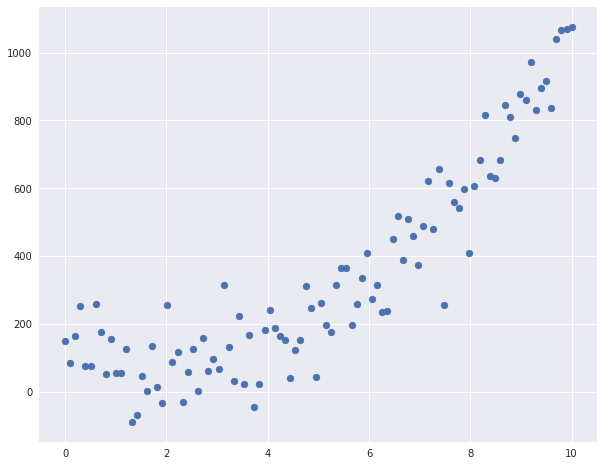

In [137]:
plt.figure(figsize=(10,8))
plt.scatter(x,y)

# first appling linear model

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model=LinearRegression()
model.fit(x.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [173]:
model_pred=model.predict(x.reshape(-1,1))

0.7643394574930141

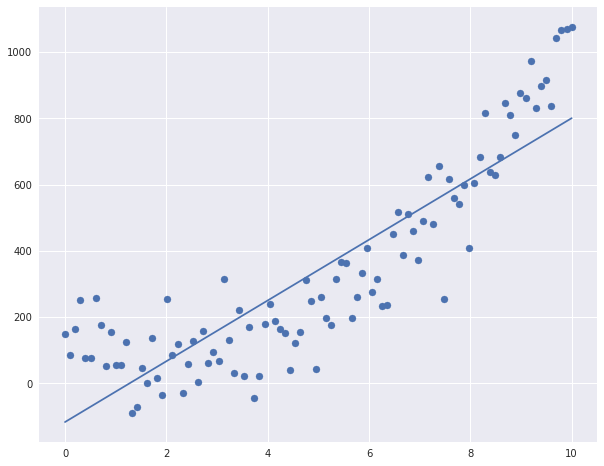

In [175]:
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(x,model_pred)
r2_score(y,model_pred)

# Now applying polynomial regression

In [149]:
from sklearn.preprocessing import PolynomialFeatures


In [192]:
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x.reshape(-1,1))#now converted to linear regression

In [193]:
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [194]:
y_pred=lin_reg2.predict(x_poly)

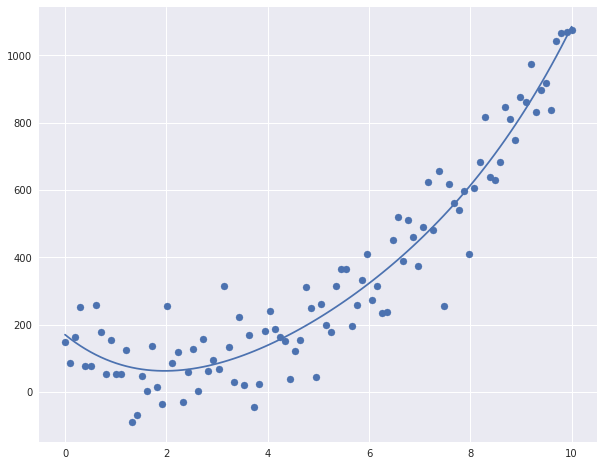

In [195]:
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(x,y_pred)


In [196]:
r2_score(y,y_pred)

0.9183791024228608

# Applying it on Boston datasets

In [197]:
df=pd.read_csv('/home/chetan/Desktop/my_projects/bostonhouse_dataset/housing.data',delim_whitespace=True,header=None)

In [230]:
col_name=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.columns=col_name
#df['B'].values

In [199]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


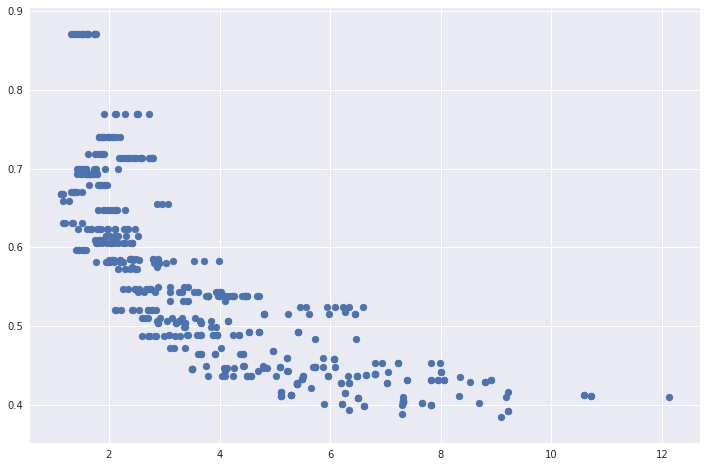

In [202]:
plt.figure(figsize=(12,8))
plt.scatter(df['DIS'],df['NOX'])

In [235]:
x_boston=df['DIS'].values
y_boston=df['NOX'].values
ll=LinearRegression()
ll.fit(x_boston.reshape(-1,1),y_boston)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [237]:
pp=ll.predict(x_boston.reshape(-1,1))

0.5917149670934201

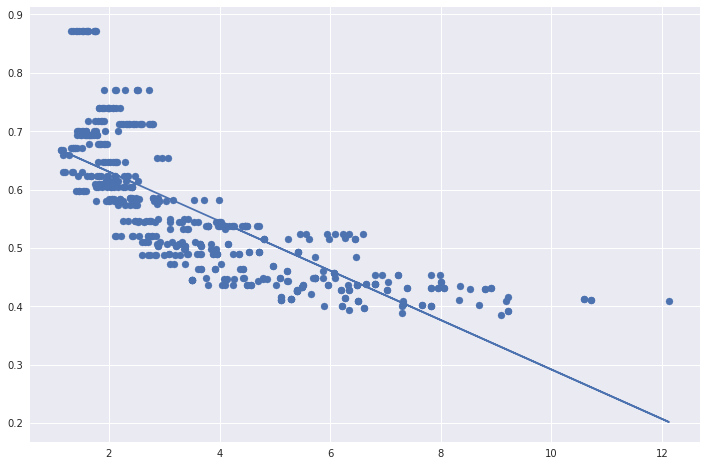

In [238]:
plt.figure(figsize=(12,8))
plt.scatter(x_boston,y_boston)
plt.plot(df['DIS'],pp)
r2_score(df['NOX'],pp)

In [207]:
pol=PolynomialFeatures(degree=2)

In [239]:
x_pol=pol.fit_transform(x_boston.reshape(-1,1))

In [240]:
mdl=LinearRegression()
mdl.fit(x_pol,y_boston)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [255]:
x_fi=np.arange(x_boston.min(),x_boston.max(),1)[:,np.newaxis]
y_prd=mdl.predict(pol.fit_transform(x_fi.reshape(-1,1)))

0.6998562064647851

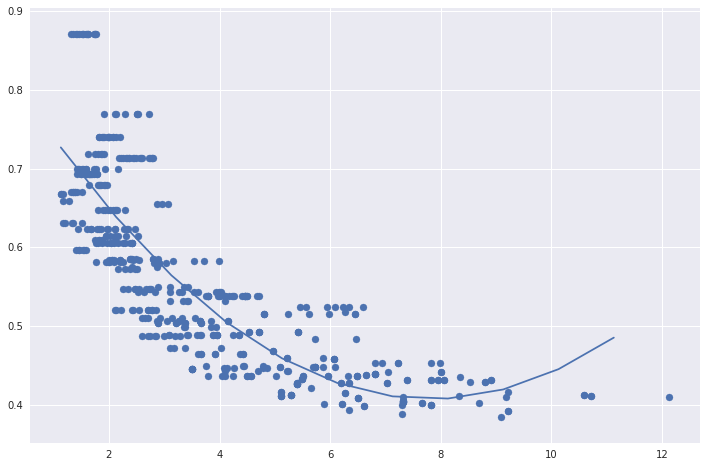

In [257]:
plt.figure(figsize=(12,8))
plt.scatter(x_boston,y_boston)
plt.plot(x_fi,y_prd)
r2_score(y_boston,mdl.predict(x_pol))

# cubic

In [261]:
ppl=PolynomialFeatures(degree=3)
xx=ppl.fit_transform(x_boston.reshape(-1,1))
mm=LinearRegression()
mm.fit(xx,y_boston)
xxx=np.arange(x_boston.min(),x_boston.max(),1)
xxx

array([ 1.1296,  2.1296,  3.1296,  4.1296,  5.1296,  6.1296,  7.1296,
        8.1296,  9.1296, 10.1296, 11.1296])

In [262]:
yyy=mm.predict(ppl.fit_transform(xxx.reshape(-1,1)))

0.7147737433422647

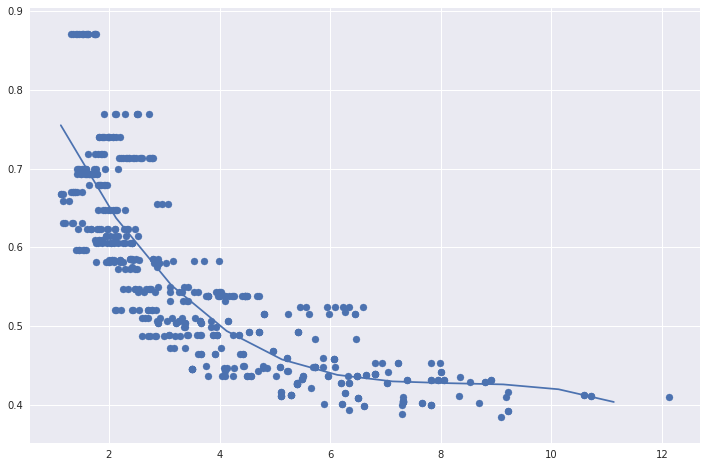

In [268]:
plt.figure(figsize=(12,8))
plt.scatter(x_boston,y_boston)
plt.plot(xxx,yyy)
r2_score(y_boston,mm.predict(xx))

# Data Preprocessing